In [1]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [2]:
data_dir = "./Dataset"
image_h = 224
image_w = 224
batch_s = 32
image_size = (image_h, image_w)  

 Fichier ignoré (pas une image) : ./Dataset\Schematics\desktop.ini
Found 41398 files belonging to 5 classes.
Using 33119 files for training.
Found 41398 files belonging to 5 classes.
Using 8279 files for validation.
Classes détectées : ['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


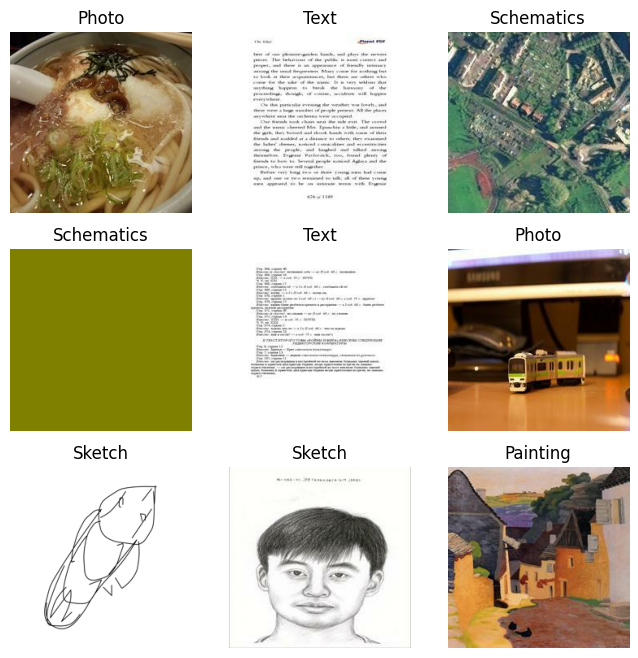

In [3]:
preprocess_images(data_dir)

# Jeu d'entraînement (80% des données)
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  
    subset="training",
    seed=42, 
    image_size=(image_h, image_w),
    batch_size=batch_s
)

# Jeu de test (20% des données)
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  
    subset="validation",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s
)

class_names = test_set.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):  # Prend un batch du dataset
    for i in range(9):  # Afficher 9 images
        ax = plt.subplot(3, 3, i + 1)  # Crée une grille 3x3
        plt.imshow(images[i].numpy().astype("uint8"))  # Affiche l'image
        plt.title(class_names[labels[i].numpy()])  # Affiche le nom de la classe
        plt.axis("off")  # Enlève les axes
plt.show()

Verifier les classes :

In [17]:
nbEpochs = 10
model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=True)
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])  
with tf.device('/GPU:1'):
    history = TrainModel(
    model=model,
    train_set=train_set,
    test_set=test_set,
    nbEpochs=nbEpochs,
    UseEarlyStopping=True , 
    modelCheckpoint="best_model.weights.h5"
    )
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                      

KeyboardInterrupt: 

1/1 [==============================] - 0s 26ms/step
Vérification des lignes (%): [100. 100. 100. 100. 100.]


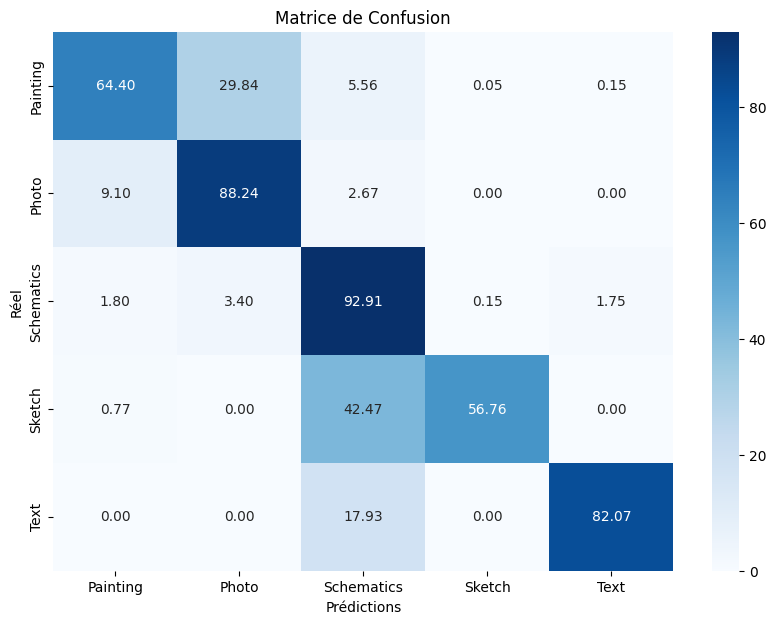

In [6]:
plot_confusion_matrix(model ,test_set , class_names)

259/259 [==============================] - 8s 28ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 111ms/step
Classe prédite: Photo avec une confiance de 0.69


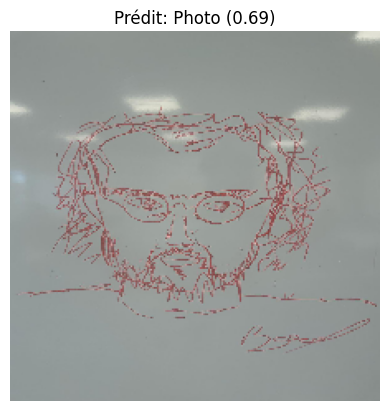

259/259 [==============================] - 7s 28ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 19ms/step
Classe prédite: Schematics avec une confiance de 1.00


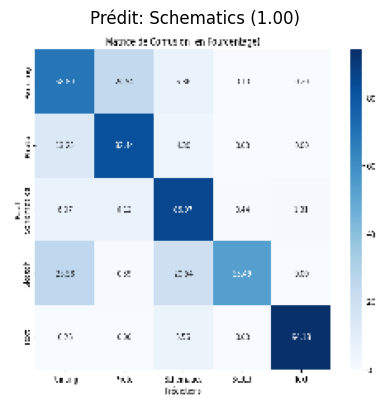

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 22ms/step
Classe prédite: Schematics avec une confiance de 1.00


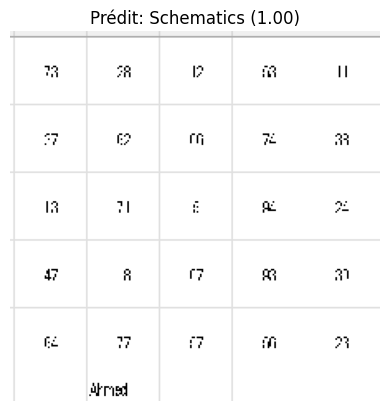

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 19ms/step
Classe prédite: Schematics avec une confiance de 1.00


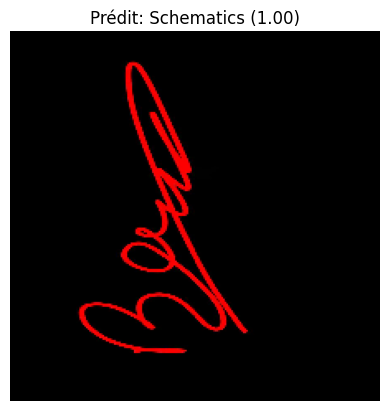

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 20ms/step
Classe prédite: Photo avec une confiance de 0.68


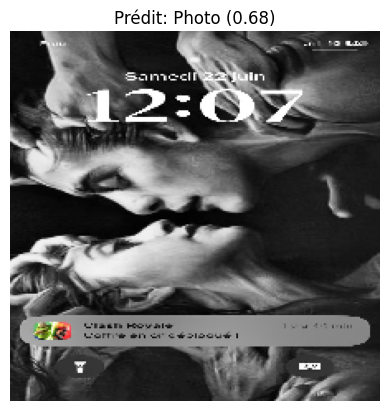

In [7]:

model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=False)
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])  
model.load_weights("best_model.weights.h5")

with tf.device('/GPU:1'):
    test_model(model, test_set, "lorenzo.jpg", class_names  , image_size )
    test_model(model, test_set, "result/output.png", class_names , image_size)
    test_model(model, test_set, "image.png", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_e55ae64f.jpg", class_names , image_size)